# Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
sales_data_with_discouts = pd.read_csv (r"C:\Users\HP\OneDrive\Desktop\Data Science\Assignments\Basic stats - 1 (1)\Basic stats - 1\sales_data_with_discounts.csv")

In [49]:
sales_data_with_discouts

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


### Descriptive Analytics for Numerical Columns

In [51]:
numerical_cols = sales_data_with_discouts.select_dtypes(include=['float64', 'int64']).columns
print (numerical_cols)

Index(['Volume', 'Avg Price', 'Total Sales Value', 'Discount Rate (%)',
       'Discount Amount', 'Net Sales Value'],
      dtype='object')


In [53]:
statistics = {}
for col in numerical_cols:
    stats = {
        'mean': sales_data_with_discouts[col].mean(),
        'median': sales_data_with_discouts[col].median(),
        'mode': sales_data_with_discouts[col].mode()[0],  
        'std_dev': sales_data_with_discouts[col].std()
        }
statistics[col] = stats
for col, stats in statistics.items():
    print(f"Statistics for {col}:")
    print(f"  Mean: {stats['mean']}")
    print(f"  Median: {stats['median']}")
    print(f"  Mode: {stats['mode']}")
    print(f"  Standard Deviation: {stats['std_dev']}\n")

Statistics for Net Sales Value:
  Mean: 30466.336131270138
  Median: 4677.788059301853
  Mode: 326.97480055470817
  Standard Deviation: 46358.656624066934



### Data Visualization

#### Histogram

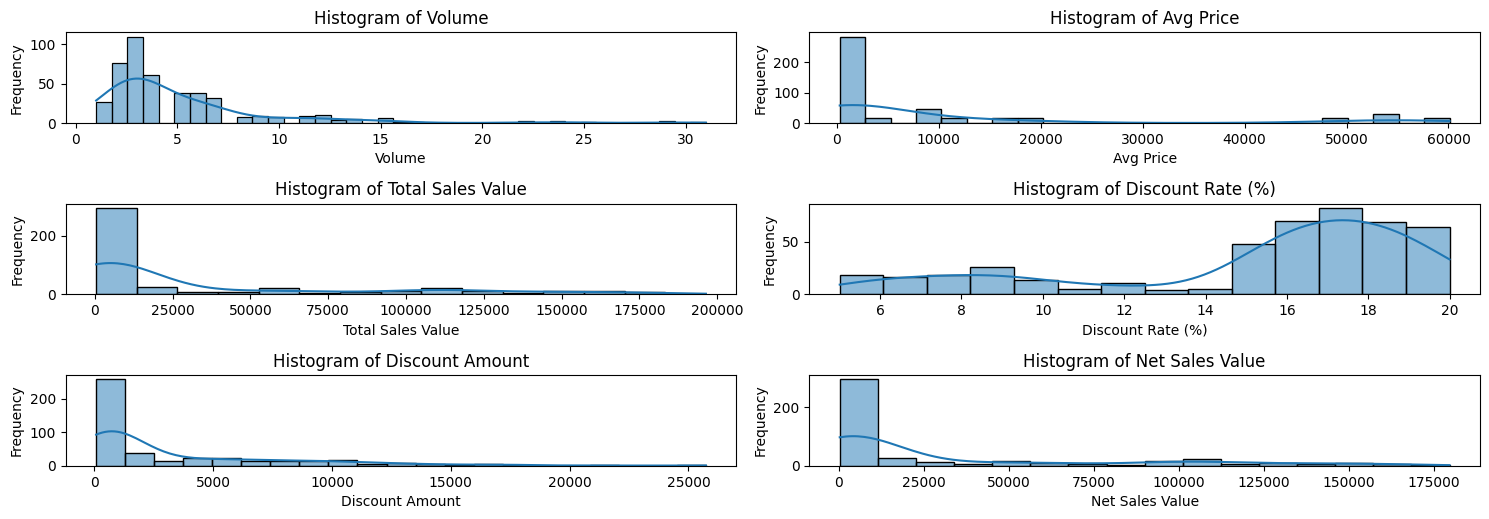

In [57]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 2, i)
    sns.histplot(sales_data_with_discouts[col], kde=True)  
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

#### Boxplots

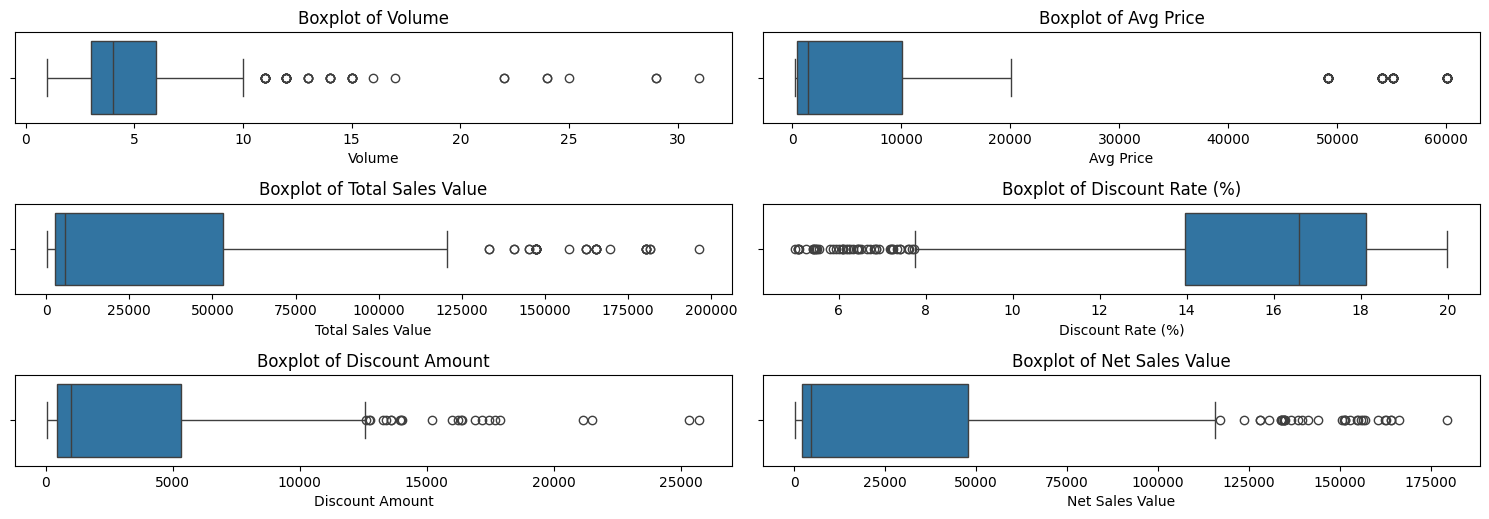

In [67]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 2, i)
    sns.boxplot(x=sales_data_with_discouts[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
plt.tight_layout()
plt.show()

#### Bar Chart Analysis for Categorical Column

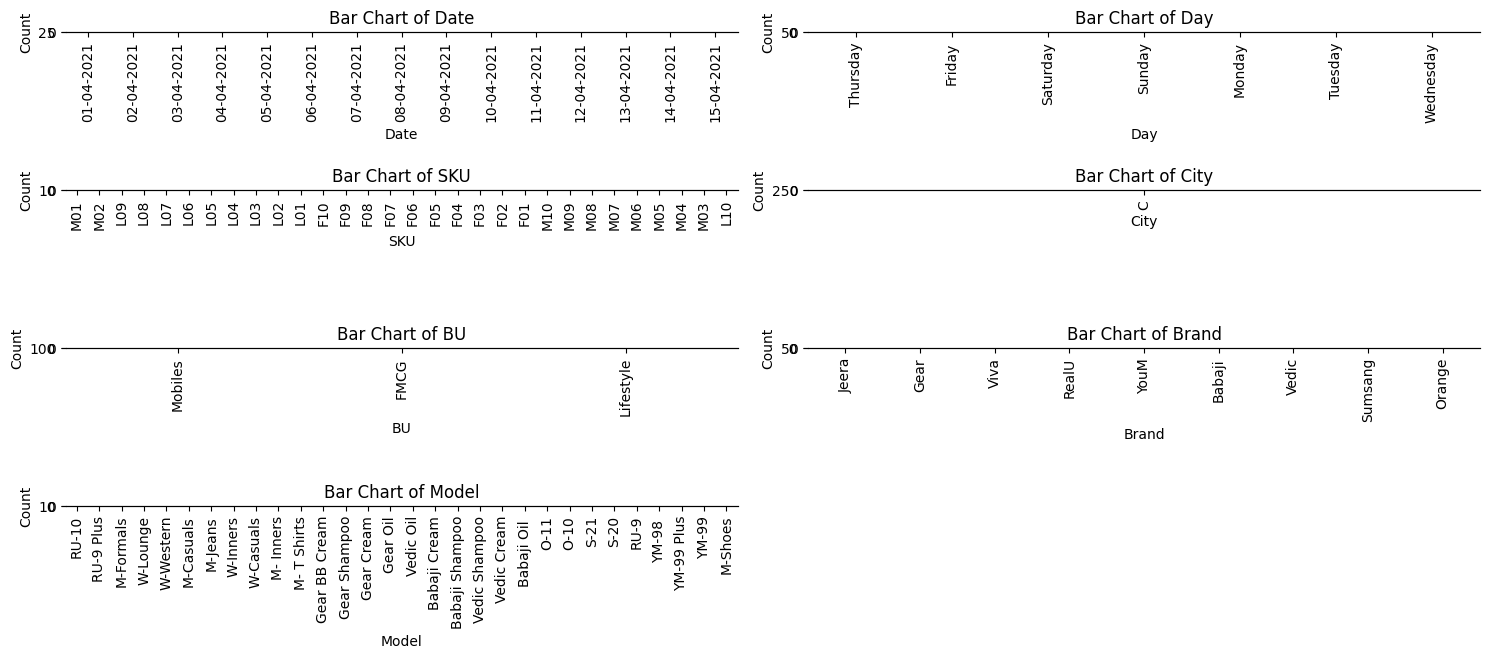

In [74]:
categorical_cols = sales_data_with_discouts.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 2, i)
    sales_data_with_discouts[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


### Standardization of Numerical Variables

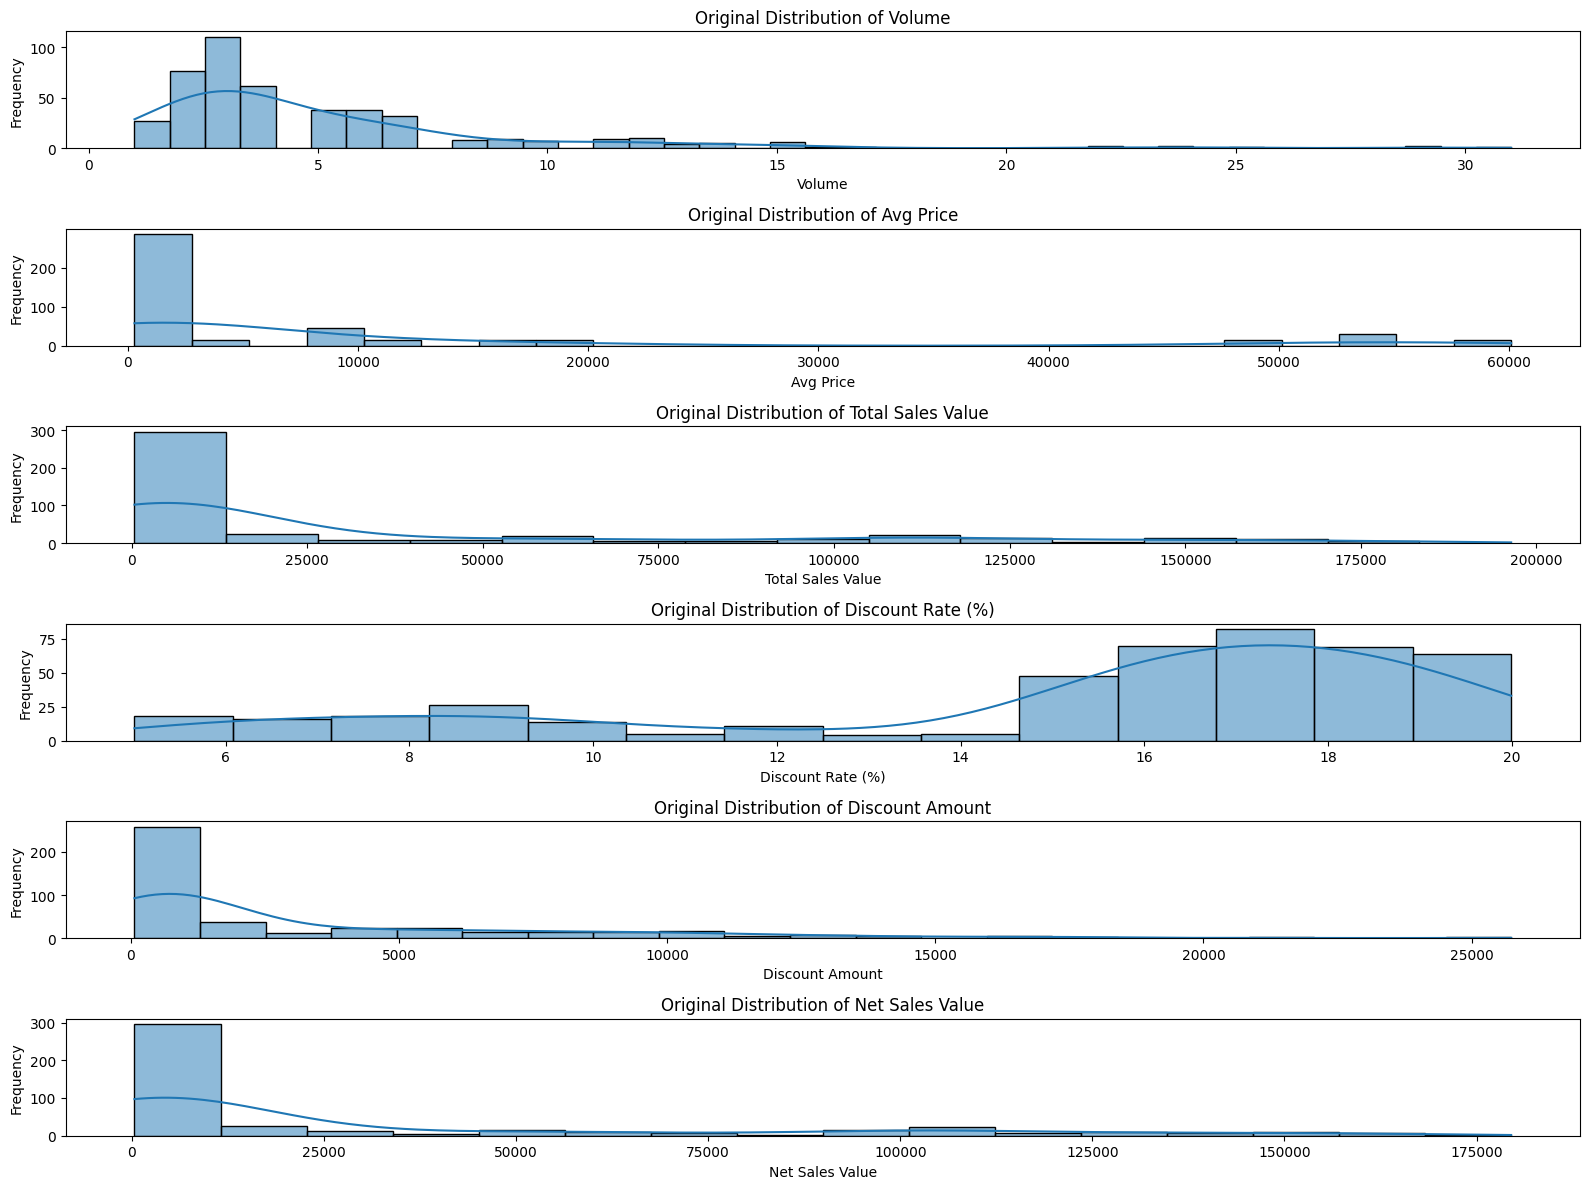

In [79]:
# Hisograms befor scaling 

plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.histplot(sales_data_with_discouts[col], kde=True)
    plt.title(f'Original Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [87]:
# Standardize the numerical columns

standardized_df = sales_data_with_discouts.copy()  
for col in numerical_cols:
    mean = sales_data_with_discouts[col].mean()
    std_dev =sales_data_with_discouts [col].std()
    standardized_df[col] = (sales_data_with_discouts[col] - mean) / std_dev

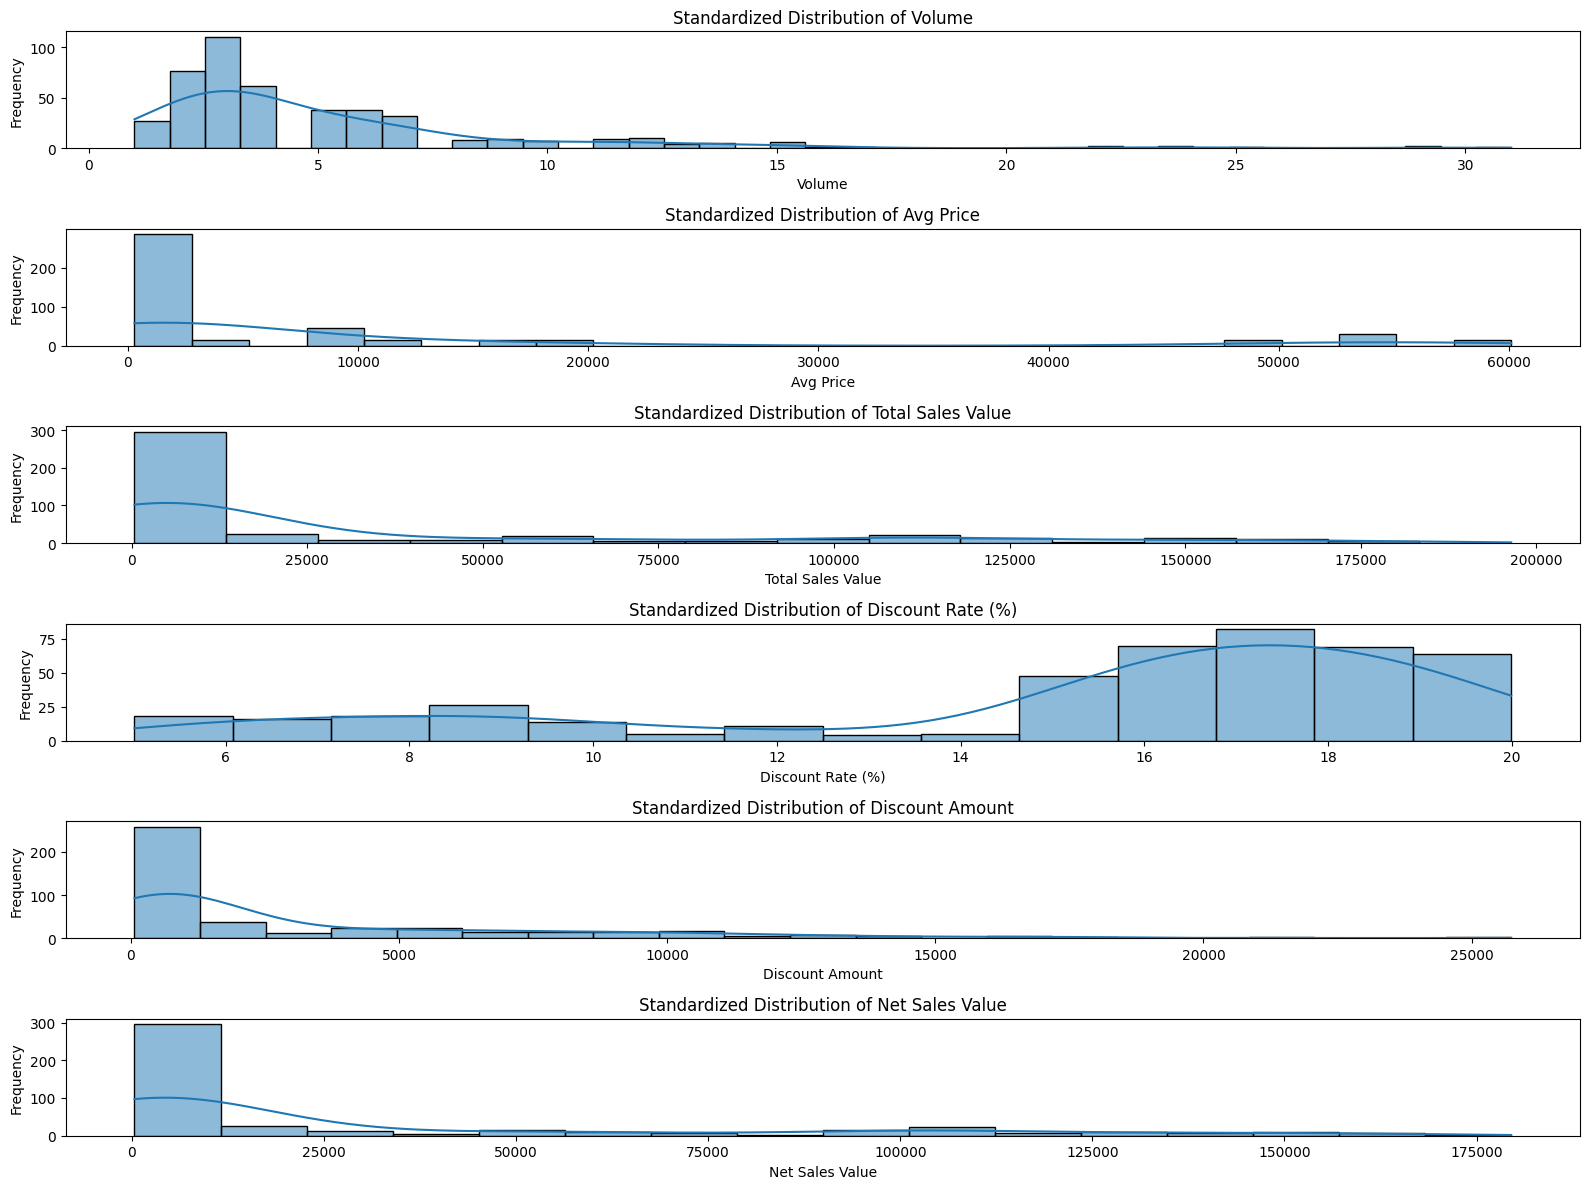

In [95]:
# histograms after standardization

plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 1, i)
    sns.histplot(sales_data_with_discouts[col], kde=True)
    plt.title(f'Standardized Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

### Conversion of Categorical Data into Dummy Variables

In [102]:
df_encoded = pd.get_dummies(sales_data_with_discouts, columns=categorical_cols, drop_first=True)

In [104]:
print(df_encoded.head(10))

   Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0      15      12100             181500          11.654820     21153.498820   
1      10      10100             101000          11.560498     11676.102961   
2       7      16100             112700           9.456886     10657.910157   
3       6      20100             120600           6.935385      8364.074702   
4       3       8100              24300          17.995663      4372.946230   
5       3       8100              24300          16.996489      4130.146805   
6       3      49100             147300           9.228812     13594.039719   
7       2      54100             108200           5.553719      6009.124321   
8       2      55100             110200           7.410104      8165.935144   
9       3      60100             180300           9.928444     17900.983733   

   Net Sales Value  Date_02-04-2021  Date_03-04-2021  Date_04-04-2021  \
0    160346.501180            False            False     